### 导库导数据，探索特征

In [1]:
import pandas as pd
import numpy as np
#切分训练集和测试集的包
from sklearn.model_selection import train_test_split

In [2]:
#导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#导入数据
df = pd.read_csv("weather.csv",index_col=0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [4]:
df.shape

(142193, 22)

In [5]:
#抽取 5000条样本进行后续处理
weather = df.sample(n=5000,random_state=0)     #frac是按比例选取

In [6]:
weather.shape  #但随机选取后会打乱索引

(5000, 22)

In [7]:
weather.index = range(weather.shape[0]) #重置索引
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [8]:
weather.columns   #提取所有的特征名

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [9]:
weather.Date.value_counts()   #查看日期 并计数

2009-08-23    9
2015-08-20    7
2013-07-06    7
2009-07-02    7
2015-11-06    7
2016-08-27    6
2012-06-17    6
2015-10-26    6
2009-02-22    6
2010-02-28    6
2017-05-29    6
2014-01-04    6
2015-10-10    6
2016-03-09    6
2015-02-09    6
2013-05-03    6
2015-10-28    5
2014-12-12    5
2016-02-21    5
2016-04-09    5
2016-04-15    5
2013-12-23    5
2009-09-23    5
2010-12-28    5
2009-12-25    5
2009-08-14    5
2009-05-04    5
2014-12-16    5
2009-11-29    5
2010-01-31    5
             ..
2009-12-04    1
2009-06-17    1
2010-03-21    1
2013-06-19    1
2015-11-18    1
2015-04-14    1
2011-12-16    1
2015-09-12    1
2012-04-11    1
2013-01-26    1
2013-12-30    1
2012-07-22    1
2011-08-20    1
2016-12-31    1
2010-07-20    1
2009-08-02    1
2011-08-10    1
2016-11-21    1
2012-02-05    1
2011-06-02    1
2016-01-05    1
2016-05-29    1
2015-07-07    1
2016-03-19    1
2015-12-02    1
2009-01-07    1
2011-09-15    1
2009-06-27    1
2010-10-23    1
2013-06-03    1
Name: Date, Length: 2486

In [10]:
weather.Location.value_counts() #查看气象站名称 并计数

Newcastle           133
PerthAirport        125
Sydney              125
Darwin              124
NorahHead           122
Hobart              122
Brisbane            121
Perth               121
SalmonGums          117
Adelaide            117
Launceston          116
MountGinini         112
PearceRAAF          112
Wollongong          112
Albany              111
Cairns              109
Canberra            108
Watsonia            108
Cobar               107
Albury              107
Ballarat            107
Nuriootpa           106
CoffsHarbour        106
BadgerysCreek       106
NorfolkIsland       105
Richmond            105
MelbourneAirport    105
Moree               103
AliceSprings        102
SydneyAirport       101
Walpole             100
GoldCoast           100
Witchcliffe          98
Tuggeranong          97
Bendigo              97
MountGambier         97
Townsville           97
Sale                 95
Penrith              94
Mildura              94
Williamtown          91
Portland        

In [11]:
len(weather.Location.value_counts())  #共49个气象站

49

In [12]:
weather.Rainfall.value_counts()   #降雨量 3167天无雨

0.0     3167
0.2      309
0.4      124
1.0       81
0.6       79
0.8       67
1.4       65
1.2       54
1.8       44
1.6       37
2.2       35
2.6       34
2.4       31
2.0       30
3.0       28
3.6       26
2.8       25
3.2       23
4.0       20
4.2       17
3.8       17
4.8       15
3.4       15
4.6       15
8.0       13
6.0       13
7.8       12
5.6       12
4.4       12
10.0      11
        ... 
21.8       1
6.4        1
43.2       1
45.0       1
21.2       1
74.8       1
25.2       1
58.2       1
20.4       1
27.4       1
14.2       1
32.2       1
23.6       1
46.8       1
73.2       1
53.6       1
19.0       1
29.8       1
57.6       1
11.6       1
53.8       1
24.6       1
19.6       1
38.8       1
38.0       1
33.0       1
8.5        1
27.0       1
42.0       1
54.2       1
Name: Rainfall, Length: 198, dtype: int64

In [13]:
weather.Cloud9am.value_counts()     #云遮蔽的程度 分类型数据

7.0    686
1.0    538
8.0    488
0.0    307
6.0    273
2.0    239
5.0    220
3.0    209
4.0    163
Name: Cloud9am, dtype: int64

In [14]:
#查看整体信息
weather.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainTomorrow     5000 non-null object
dtypes: float64(16), object(6)
memory usa

In [15]:
#将特征矩阵和标签Y分开 分别提取特征矩阵和标签
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [16]:
X.shape

(5000, 21)

In [17]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,13.0,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7


In [18]:
#查看标签类别
np.unique(Y) #查看标签唯一值

array(['No', 'Yes'], dtype=object)

In [19]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
dtypes: float64(16), object(5)
memory usage: 820.4+ KB


In [20]:
#探索特征缺失值
#查看缺失值的比例（各个特征的缺失值比例）
X.isnull().mean() 

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

In [21]:
X.isnull().mean().max() #特征最大缺失比例

0.4816

In [22]:
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [23]:
Xtrain  #打乱切分 索引改变

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1809,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
4176,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
110,2017-06-14,GoldCoast,16.3,20.6,17.8,NaN,NaN,SE,72.0,S,...,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3582,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
2162,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
670,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4
1257,2014-09-14,Richmond,9.1,25.5,0.0,NaN,NaN,SE,35.0,ENE,...,6.0,4.0,95.0,41.0,1020.8,1014.9,3.0,1.0,14.0,25.2
1561,2016-08-02,Cobar,8.5,10.1,1.0,2.0,NaN,SW,44.0,SSW,...,15.0,20.0,96.0,90.0,1013.3,1012.9,8.0,8.0,9.9,8.5
4019,2013-01-14,Cairns,21.4,31.1,0.0,10.4,12.3,NNE,31.0,E,...,7.0,17.0,63.0,58.0,1009.5,1007.1,2.0,1.0,28.8,30.4
2327,2013-05-11,Ballarat,9.4,21.7,0.0,NaN,NaN,N,50.0,NNE,...,20.0,35.0,66.0,36.0,1027.5,1022.9,NaN,NaN,14.2,20.3


In [24]:
Xtrain.shape

(3500, 21)

In [25]:
Xtest.shape

(1500, 21)

In [26]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0]) 

In [27]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2017-06-14,GoldCoast,16.3,20.6,17.8,NaN,NaN,SE,72.0,S,...,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2


In [28]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,2.0,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,0.0,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,9.0,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,17.0,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,15.0,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8


In [29]:
#查看标签是否存在样本不均衡问题
Ytrain.value_counts()  #训练集样本不均衡 要处理

No     2710
Yes     790
Name: RainTomorrow, dtype: int64

In [30]:
Ytest.value_counts()  #测试集样本不均衡不影响

No     1137
Yes     363
Name: RainTomorrow, dtype: int64

In [31]:
#将标签编码
from sklearn.preprocessing import LabelEncoder  #标签专用编码包
from sklearn.preprocessing import OrdinalEncoder  #特征专用包

In [32]:
encorder = LabelEncoder().fit(Ytrain)  #模型中相当于是[0,1] 

In [33]:
encorder

LabelEncoder()

In [34]:
encorder.transform(Ytrain) 

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
encorder.transform(Ytest) 

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
encorder.classes_  #查看编码信息 no编码为0  yes编码为1

array(['No', 'Yes'], dtype=object)

In [37]:
#关于fit/transform/fit_transform 的使用情况
# fit完之后得到一个模型，如果想要把模型运用到不同的对象上，那就fit和transform分开
# 如果想把fit完之后的模型运用到同一个对象上，可以直接写 fit_transform

In [38]:
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest)) 

In [39]:
Ytrain.head()

,0
0,0
1,0
2,1
3,0
4,0


In [40]:
Ytest.head(2)

,0
0,0
1,0


### 处理异常值

In [41]:
#描述性统计  #括号内可填列表 查看你想看的百分比，默认为min 25% 75% max等
#看数据的变化 可以看出最大最小部分是否为异常值
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3477.0,12.340236,6.384294,-6.9,-2.024,2.1,4.3,7.700,12.1,17.0,20.9,25.824,29.1
MaxTemp,3492.0,23.232904,6.992256,-4.1,8.900,12.7,14.6,18.200,22.7,28.1,32.8,39.600,43.7
Rainfall,3460.0,2.106618,6.570495,0.0,0.000,0.0,0.0,0.000,0.0,0.8,6.0,35.400,102.0
Evaporation,1986.0,5.398489,3.837948,0.0,0.400,1.0,1.4,2.725,4.8,7.4,9.8,17.430,52.4
Sunshine,1835.0,7.723869,3.691531,0.0,0.000,0.4,2.0,5.100,8.5,10.6,12.0,13.400,14.3
WindGustSpeed,3254.0,39.878611,13.492322,9.0,15.000,20.0,24.0,31.000,39.0,46.0,57.0,81.000,115.0
WindSpeed9am,3470.0,13.924784,8.861956,0.0,0.000,0.0,4.0,7.000,13.0,19.0,26.0,39.000,52.0
WindSpeed3pm,3426.0,18.765032,8.915825,0.0,2.000,6.0,7.0,13.000,19.0,24.0,30.0,43.000,78.0
Humidity9am,3460.0,68.844509,18.918369,5.0,18.000,35.0,44.0,57.000,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3405.0,51.628781,20.705426,1.0,9.000,17.0,24.0,37.000,52.0,65.0,79.6,97.960,100.0


In [42]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1491.0,12.211335,6.458887,-6.3,-2.500,1.50,3.90,7.6,12.2,16.800,20.70,25.610,28.5
MaxTemp,1494.0,23.330857,7.380122,-0.6,7.686,12.60,14.40,18.0,22.7,28.775,33.50,40.500,44.4
Rainfall,1477.0,2.338456,8.114066,0.0,0.000,0.00,0.00,0.0,0.0,0.800,6.20,31.632,164.2
Evaporation,827.0,5.492745,4.007532,0.0,0.200,0.80,1.40,2.6,4.8,7.600,10.40,16.000,58.5
Sunshine,757.0,7.756803,3.815881,0.0,0.000,0.48,1.66,4.9,8.6,10.700,12.30,13.400,14.0
WindGustSpeed,1388.0,40.164986,14.144410,11.0,15.000,20.00,24.00,30.0,39.0,48.000,57.00,87.000,102.0
WindSpeed9am,1481.0,14.135719,9.018514,0.0,0.000,0.00,4.00,7.0,13.0,19.000,26.00,37.400,72.0
WindSpeed3pm,1470.0,18.759184,9.002335,0.0,2.000,6.00,8.80,13.0,19.0,24.000,30.00,44.620,65.0
Humidity9am,1487.0,67.854069,19.342026,8.0,16.860,32.30,42.60,56.0,68.0,83.000,94.00,100.000,100.0
Humidity3pm,1464.0,50.962432,21.100400,4.0,8.000,15.00,23.00,35.0,52.0,65.000,79.00,97.370,100.0


In [43]:
#提取出所有的数值型特征的列名
col = Xtrain.mean().index

In [44]:
len(col) #16个数值型特征  实则为14个 云的出现实则为分类型

16

In [45]:
col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [46]:
(Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std()  #

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.043148,0.939196,-0.320618,0.573617,-0.033555,-0.880398,-0.104354,0.026354,0.748241,0.307708,-0.160064,-0.233704,0.886672,-0.568889,0.973678,1.098613
1,-1.024426,-1.520669,-0.320618,-0.520718,-0.250267,-0.658049,0.121329,0.026354,NaN,-0.271851,0.205469,0.207907,0.886672,-1.307642,-1.397385,-1.469870
2,0.620235,-0.376546,2.388463,NaN,NaN,2.380716,2.603851,3.727638,1.646838,2.336161,0.810005,1.076884,NaN,NaN,0.162525,-0.244003
3,-0.899118,-1.635081,0.075090,-1.093941,-1.550541,-0.065119,-0.330038,0.138514,1.646838,1.418528,0.627238,0.934429,1.236254,0.908617,-1.397385,-1.484464
4,0.886514,1.625669,-0.320618,NaN,NaN,-0.065119,-1.345615,-0.197966,-0.256074,-0.948002,-1.523785,-1.715237,NaN,-1.307642,1.176466,1.682360
5,0.150332,-0.004706,-0.320618,NaN,NaN,-0.361584,0.347013,-1.095247,-1.366107,-0.899705,NaN,NaN,0.537090,-1.307642,-0.399043,0.106245
6,-0.507532,0.324230,-0.320618,NaN,NaN,-0.361584,-0.894248,-1.656048,1.382545,-0.513333,0.458531,-0.034266,-0.511657,-1.307642,-0.477038,0.514867
7,-0.601513,-1.878207,-0.168422,-0.885497,NaN,0.305462,0.121329,0.138514,1.435403,1.853196,-0.595893,-0.319177,1.236254,1.277994,-1.116601,-1.922273
8,1.419071,1.125116,-0.320618,1.303173,1.239629,-0.658049,-0.781406,-0.197966,-0.308933,0.307708,-1.130134,-1.145417,-0.861239,-1.307642,1.831628,1.273737
9,-0.460542,-0.219229,-0.320618,NaN,NaN,0.750159,0.685539,1.820916,-0.150357,-0.754816,1.400482,1.105375,NaN,NaN,-0.445840,-0.200222


In [47]:
np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std()) #求绝对值

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.043148,0.939196,0.320618,0.573617,0.033555,0.880398,0.104354,0.026354,0.748241,0.307708,0.160064,0.233704,0.886672,0.568889,0.973678,1.098613
1,1.024426,1.520669,0.320618,0.520718,0.250267,0.658049,0.121329,0.026354,NaN,0.271851,0.205469,0.207907,0.886672,1.307642,1.397385,1.469870
2,0.620235,0.376546,2.388463,NaN,NaN,2.380716,2.603851,3.727638,1.646838,2.336161,0.810005,1.076884,NaN,NaN,0.162525,0.244003
3,0.899118,1.635081,0.075090,1.093941,1.550541,0.065119,0.330038,0.138514,1.646838,1.418528,0.627238,0.934429,1.236254,0.908617,1.397385,1.484464
4,0.886514,1.625669,0.320618,NaN,NaN,0.065119,1.345615,0.197966,0.256074,0.948002,1.523785,1.715237,NaN,1.307642,1.176466,1.682360
5,0.150332,0.004706,0.320618,NaN,NaN,0.361584,0.347013,1.095247,1.366107,0.899705,NaN,NaN,0.537090,1.307642,0.399043,0.106245
6,0.507532,0.324230,0.320618,NaN,NaN,0.361584,0.894248,1.656048,1.382545,0.513333,0.458531,0.034266,0.511657,1.307642,0.477038,0.514867
7,0.601513,1.878207,0.168422,0.885497,NaN,0.305462,0.121329,0.138514,1.435403,1.853196,0.595893,0.319177,1.236254,1.277994,1.116601,1.922273
8,1.419071,1.125116,0.320618,1.303173,1.239629,0.658049,0.781406,0.197966,0.308933,0.307708,1.130134,1.145417,0.861239,1.307642,1.831628,1.273737
9,0.460542,0.219229,0.320618,NaN,NaN,0.750159,0.685539,1.820916,0.150357,0.754816,1.400482,1.105375,NaN,NaN,0.445840,0.200222


In [48]:
(np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum() #每一列异常值的数量

MinTemp           1
MaxTemp           8
Rainfall         76
Evaporation      22
Sunshine          0
WindGustSpeed    37
WindSpeed9am     34
WindSpeed3pm     21
Humidity9am      13
Humidity3pm       0
Pressure9am      12
Pressure3pm      10
Cloud9am          0
Cloud3pm          0
Temp9am           4
Temp3pm           9
dtype: int64

In [49]:
#查看训练集各列异常值的比例   三倍标准差
(np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtrain.shape[0] 

MinTemp          0.000286
MaxTemp          0.002286
Rainfall         0.021714
Evaporation      0.006286
Sunshine         0.000000
WindGustSpeed    0.010571
WindSpeed9am     0.009714
WindSpeed3pm     0.006000
Humidity9am      0.003714
Humidity3pm      0.000000
Pressure9am      0.003429
Pressure3pm      0.002857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.001143
Temp3pm          0.002571
dtype: float64

In [50]:
a = [1,2,4]
a.append([5,6,7]) 
a  #直接添加列表

[1, 2, 4, [5, 6, 7]]

In [51]:
b=[1,2,4]
b.extend([5,6,7])
b  #将列表拆为元素 并填入

[1, 2, 4, 5, 6, 7]

In [52]:
#删除异常值
#提取出所有训练集所有异常值的索引
deltrain = []
for i in col:
    bool_ = np.abs((Xtrain.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtrain[bool_].index
    deltrain.extend(list(ind))

In [53]:
len(deltrain)

247

In [54]:
#去重之后有异常值的行索引
deltrain1 = list(set(deltrain)) 

In [55]:
len(deltrain1)

199

In [56]:
#查看测试集各列异常值（注意这里的均值和方差需要用训练集的）
(np.abs((Xtest.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtest.shape[0]

MinTemp          0.000000
MaxTemp          0.004000
Rainfall         0.024667
Evaporation      0.004667
Sunshine         0.000000
WindGustSpeed    0.013333
WindSpeed9am     0.007333
WindSpeed3pm     0.010000
Humidity9am      0.004667
Humidity3pm      0.000000
Pressure9am      0.004000
Pressure3pm      0.004000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000667
Temp3pm          0.005333
dtype: float64

In [57]:
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((Xtest.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtest[bool_].index
    deltest.extend(list(ind)) 

In [58]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest)) 

In [59]:
len(deltest)  #124个异常

124

In [60]:
len(deltest1)  #去重后90个异常

90

In [61]:
#删除训练集特征的异常值
Xtrain = Xtrain.drop(index=deltrain1)

In [62]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
5,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [63]:
Xtrain.shape #删除了199条数据

(3301, 21)

In [64]:
#删除训练集标签的异常值
Ytrain = Ytrain.drop(index=deltrain1)

In [65]:
Ytrain.shape

(3301, 1)

In [66]:
#删除测试集特征的异常值 
Xtest= Xtest.drop(index=deltest1)

In [67]:
Xtest.shape  #删除了90条数据

(1410, 21)

In [68]:
#删除测试集标签的异常值
Ytest= Ytest.drop(index=deltest1)

In [69]:
Ytest.shape

(1410, 1)

In [70]:
#进行任何行删除之后，千万记得要恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [71]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [72]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,2.0,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,0.0,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,9.0,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,17.0,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,15.0,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8


### 处理困难特征：日期

In [73]:
Xtrain.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6


In [74]:
Xtrain.iloc[:,0].value_counts()  

2009-08-23    6
2015-11-06    6
2015-10-10    5
2016-02-21    5
2015-07-13    5
2015-02-06    5
2009-11-29    5
2013-08-22    5
2011-09-11    5
2015-01-18    5
2015-02-09    5
2009-08-14    5
2009-02-22    5
2015-11-27    4
2011-06-12    4
2015-04-03    4
2014-11-03    4
2010-03-18    4
2012-11-29    4
2016-04-09    4
2009-03-23    4
2011-01-24    4
2010-04-25    4
2016-07-15    4
2014-04-18    4
2010-01-25    4
2010-09-15    4
2012-04-24    4
2013-07-06    4
2010-04-03    4
             ..
2013-03-10    1
2011-10-19    1
2014-02-10    1
2016-08-13    1
2013-12-12    1
2014-09-30    1
2013-11-06    1
2013-03-25    1
2014-12-16    1
2016-06-10    1
2016-12-24    1
2012-01-19    1
2015-12-28    1
2016-04-26    1
2014-07-18    1
2011-10-14    1
2009-11-30    1
2010-12-31    1
2015-07-10    1
2010-08-28    1
2008-12-15    1
2009-08-22    1
2015-09-04    1
2014-11-06    1
2012-03-21    1
2010-03-21    1
2012-09-10    1
2013-04-01    1
2013-06-19    1
2010-08-19    1
Name: Date, Length: 2025

In [75]:
Xtrain.iloc[:,0].value_counts().count()

2025

In [76]:
#查看重复值
Xtrain.duplicated().sum()   #无重复值
#删除重复值 .drop_duplicates()

0

In [77]:
#查看日期的种类方法一
Xtrain.Date.value_counts().count()

2025

In [78]:
#查看日期的种类方法二
len(set(Xtrain.Date))
# 超过7个后 sklearn默认为连续型变量

2025

In [79]:
Xtrain.Rainfall.value_counts()

0.0     2157
0.2      209
0.4       90
1.0       54
0.6       48
0.8       45
1.4       43
1.2       35
1.8       31
1.6       28
2.2       21
2.0       21
2.4       21
2.6       21
3.6       20
3.0       19
3.2       15
2.8       15
3.8       13
6.0       12
4.0       11
4.8       10
3.4       10
4.6        9
4.2        9
9.8        9
5.8        8
7.2        8
5.6        8
11.8       7
        ... 
8.2        2
21.6       2
21.0       2
17.4       2
20.0       2
19.8       1
0.3        1
21.2       1
1.1        1
19.0       1
15.4       1
18.4       1
19.2       1
2.3        1
21.8       1
19.6       1
5.5        1
18.0       1
14.0       1
8.5        1
15.8       1
6.9        1
11.6       1
18.6       1
13.6       1
14.2       1
16.4       1
18.8       1
19.4       1
17.8       1
Name: Rainfall, Length: 113, dtype: int64

In [80]:
#查看Rainfall是否有缺失值
Xtrain.Rainfall.isnull().sum()

38

In [81]:
Xtrain["Rainfall"].head(20)

Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"  #阈值可以设置为 >0 和 <=0
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan  #令缺失值依旧缺失

Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

Xtrain.head()
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6,No
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0,No
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


In [82]:
Xtrain['RainToday'].value_counts()

No     2555
Yes     708
Name: RainToday, dtype: int64

In [83]:
Xtrain.shape

(3301, 22)

In [84]:
#月份有影响 季节可能影响下雨
Xtrain.loc[0,"Date"] #提取日期

'2016-03-14'

In [85]:
Xtrain.loc[0,"Date"].split("-")  #  -为分隔符 提取数据

['2016', '03', '14']

In [86]:
#提取月份
Xtrain.loc[0,"Date"].split("-")[1]  

'03'

In [87]:
int(Xtrain.loc[0,"Date"].split("-")[1]) #提取出月份 并整数化

3

In [88]:
# apply指的是循环
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
Xtrain = Xtrain.rename(columns={"Date":"Month"})  #用Month更改Date
# 作用同上一句相同 Xtrain.rename(columns={"Date":"Month"}，inplace=True)
Xtrain.head() 

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,9,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,7,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,1,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [89]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})
Xtest.head() 

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6,No
1,4,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0,No
2,3,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


### 处理分类型变量的缺失值

分类型变量：填众数

连续型变量：填均值

In [90]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Location         0.000000
MinTemp          0.006968
MaxTemp          0.002121
Rainfall         0.011512
Evaporation      0.432899
Sunshine         0.475613
WindGustDir      0.069979
WindGustSpeed    0.069676
WindDir9am       0.073614
WindDir3pm       0.029991
WindSpeed9am     0.008482
WindSpeed3pm     0.021509
Humidity9am      0.010906
Humidity3pm      0.027264
Pressure9am      0.102999
Pressure3pm      0.103302
Cloud9am         0.369888
Cloud3pm         0.396547
Temp9am          0.004847
Temp3pm          0.021206
RainToday        0.011512
dtype: float64

In [91]:
Xtrain.columns #所有列名

Index(['Month', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [92]:
#首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()  #提取类型为object的列 

In [93]:
cate

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [94]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [95]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

In [96]:
#实例化模型
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数

In [97]:
si=si.fit(Xtrain.loc[:,cate])  #这里本质上是生成了每一列的众数
si

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [98]:
#然后我们用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

Xtrain.head()
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,7.0,7.0,1.9,10.6,No
1,4,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,N,...,9.0,68.0,46.0,1030.8,1028.4,7.0,7.0,14.1,16.0,No
2,3,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


In [99]:
#查看分类型特征是否依然存在缺失值
Xtrain.loc[:,cate].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [100]:
#确认测试集中是否还有缺失值
Xtest.loc[:,cate].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [101]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])

#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

Xtrain.loc[:,cate].head()
Xtest.loc[:,cate].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,17.0,9.0,0.0,8.0,0.0,7.0,7.0
1,0.0,9.0,3.0,2.0,0.0,7.0,7.0
2,33.0,0.0,9.0,2.0,0.0,8.0,1.0
3,33.0,2.0,2.0,9.0,0.0,6.0,3.0
4,33.0,11.0,12.0,12.0,1.0,7.0,8.0


将分类型变量进行编码

In [102]:
#将所有的分类型变量编码为数字，一个类别是一个数字 
from sklearn.preprocessing import OrdinalEncoder #特征专用编码包：输入必须为二维及以上
oe = OrdinalEncoder()  #实例化

In [103]:
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])  #相当于把每一列编码，并记录对应关系

In [104]:
#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别，可以编为-1
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

In [105]:
Xtrain.loc[:,cate].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,45.0,9.0,7.0,9.0,0.0,7.0,3.0
1,15.0,2.0,3.0,9.0,0.0,7.0,1.0
2,44.0,8.0,12.0,11.0,1.0,8.0,7.0
3,41.0,12.0,0.0,12.0,0.0,7.0,1.0
4,17.0,6.0,10.0,3.0,0.0,6.0,1.0


In [106]:
Xtest.loc[:,cate].head() 

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,17.0,9.0,0.0,8.0,0.0,7.0,7.0
1,0.0,9.0,3.0,2.0,0.0,7.0,7.0
2,33.0,0.0,9.0,2.0,0.0,8.0,1.0
3,33.0,2.0,2.0,9.0,0.0,6.0,3.0
4,33.0,11.0,12.0,12.0,1.0,7.0,8.0


### 处理连续型变量：填补缺失值

In [107]:
#提取连续型特征的名字
# 提取所有列 删掉分类型变量
col = Xtrain.columns.tolist()
for i in cate:
    col.remove(i)

In [108]:
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [109]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")

In [110]:
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col])  #相当于计算出每一列的均值

In [111]:
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

Xtrain.head()
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-0.6,10.8,0.0,5.173344,7.826516,9.0,20.0,0.0,...,7.0,94.0,54.0,1017.898109,1015.46,7.0,7.0,1.9,10.6,0.0
1,4.0,0.0,8.7,16.7,0.0,1.600000,7.826516,9.0,22.0,3.0,...,9.0,68.0,46.0,1030.800000,1028.40,7.0,7.0,14.1,16.0,0.0
2,3.0,33.0,7.7,19.0,0.0,5.400000,10.300000,0.0,33.0,9.0,...,15.0,62.0,50.0,1027.700000,1026.00,8.0,1.0,13.9,18.4,0.0
3,2.0,33.0,14.8,21.7,0.0,2.200000,12.500000,2.0,33.0,2.0,...,19.0,61.0,47.0,1018.500000,1015.20,6.0,3.0,15.9,21.5,0.0
4,2.0,33.0,10.8,18.2,2.0,5.173344,7.826516,11.0,37.0,12.0,...,22.0,74.0,55.0,1015.800000,1016.70,7.0,8.0,13.1,16.8,1.0


###  处理连续型变量：无量纲化

In [112]:
#查看是否存在量纲不统一问题
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,3301.0,6.360497,3.431097,1.0,3.000000,6.000000,9.0,12.0
Location,3301.0,23.456831,14.057405,0.0,11.000000,23.000000,35.0,48.0
MinTemp,3301.0,12.254912,6.291149,-5.3,7.700000,12.000000,16.8,29.1
MaxTemp,3301.0,23.285641,6.788046,3.4,18.300000,22.800000,28.1,42.9
Rainfall,3301.0,1.299081,3.327557,0.0,0.000000,0.000000,0.6,21.8
Evaporation,3301.0,5.173344,2.381357,0.0,4.200000,5.173344,5.2,16.6
Sunshine,3301.0,7.826516,2.627575,0.0,7.826516,7.826516,8.9,14.3
WindGustDir,3301.0,7.771584,4.520786,0.0,4.000000,9.000000,11.0,15.0
WindGustSpeed,3301.0,38.749267,11.634887,9.0,31.000000,38.749267,44.0,80.0
WindDir9am,3301.0,6.932445,4.501917,0.0,3.000000,7.000000,11.0,15.0


In [113]:
col.remove("Month")
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [114]:
#对连续型变量进行数据标准化
from sklearn.preprocessing import StandardScaler  #标准化的包

ss = StandardScaler()  #实例化
ss = ss.fit(Xtrain.loc[:,col])  #相当于生成每一列的均值和标准差
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

Xtrain.head()
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-2.043643,-1.839636,-0.390460,0.000000,-6.761467e-16,9.0,-1.611714,0.0,...,-1.370297,1.374425,0.145373,-1.763185e-14,-1.776614e-14,7.0,7.0,-2.399122,-1.695228,0.0
1,4.0,0.0,-0.565151,-0.970329,-0.390460,-1.500777,-6.761467e-16,9.0,-1.439791,3.0,...,-1.127866,-0.042031,-0.260446,2.000972e+00,2.022168e+00,7.0,7.0,-0.463685,-0.873665,0.0
2,3.0,33.0,-0.724129,-0.631447,-0.390460,0.095194,9.414987e-01,0.0,-0.494215,9.0,...,-0.400574,-0.368906,-0.057536,1.520189e+00,1.647113e+00,8.0,1.0,-0.495413,-0.508526,0.0
3,2.0,33.0,0.404612,-0.233628,-0.390460,-1.248782,1.778900e+00,2.0,-0.494215,2.0,...,0.084288,-0.423385,-0.209718,9.334813e-02,-4.063088e-02,6.0,3.0,-0.178129,-0.036889,0.0
4,2.0,33.0,-0.231298,-0.749319,0.210673,0.000000,-6.761467e-16,11.0,-0.150370,12.0,...,0.447934,0.284843,0.196100,-3.253985e-01,1.937780e-01,7.0,8.0,-0.622327,-0.751952,1.0


In [115]:
Xtrain.shape

(3301, 22)

In [119]:
#建议大家把处理干净的数据保存下来
# Xtrain.to_csv('weather_Xtrain.csv',encoding='utf-8')

In [120]:
# Xtest.to_csv('weather_Xtest.csv',encoding='utf-8')

In [121]:
# Ytrain.to_csv('weather_Ytrain.csv',encoding='utf-8')

In [122]:
# Ytest.to_csv('weather_Ytest.csv',encoding='utf-8')

### 建模与模型评估

In [116]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [117]:
# 查看标签
Ytrain.head(2)

,0
0,0
1,0


In [118]:
Ytest.head(2)

,0
0,0
1,0


In [120]:
#对标签进行转换(方法一)
Ytrain = Ytrain.iloc[:,0].values 

In [121]:
#扁平化(方法二)
Ytest = Ytest.iloc[:,0].ravel()

In [122]:
Ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
Ytest

array([0, 0, 0, ..., 0, 0, 1])

In [125]:
#核函数学习曲线
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time() 
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)  #少数类的预测准确率
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))  # roc曲线下的面积
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.828369, recall is 0.386792', auc is 0.851239
00:02:569140
poly 's testing accuracy 0.826241, recall is 0.364780', auc is 0.852003
00:00:567475
rbf 's testing accuracy 0.798582, recall is 0.125786', auc is 0.751071
00:01:139953
sigmoid 's testing accuracy 0.743262, recall is 0.037736', auc is 0.438671
00:00:563493


### 模型调参

#### 最求最高Recall

In [126]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,class_weight = "balanced"  #加权重
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.790071, recall is 0.761006', auc is 0.856095
00:02:884298
poly 's testing accuracy 0.785816, recall is 0.742138', auc is 0.855824
00:00:743037
rbf 's testing accuracy 0.792908, recall is 0.380503', auc is 0.754343
00:01:272564
sigmoid 's testing accuracy 0.755319, recall is 0.015723', auc is 0.439958
00:01:325482


In [127]:
times = time()
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
#为了关注少数类 

testing accuracy 0.641135, recall is 0.930818', auc is 0.857609
00:05:476356


#### 追求最高准确率

In [128]:
valuec = pd.Series(Ytest).value_counts()
valuec

0    1092
1     318
dtype: int64

In [129]:
valuec[0]/valuec.sum()

0.774468085106383

In [130]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear"
          ,gamma="auto"
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)

cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 123,  195],
       [  47, 1045]], dtype=int64)

In [131]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.956959706959707

In [132]:
irange = np.linspace(0.01,0.05,10)

for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.828369, recall is 0.389937', auc is 0.851216
00:02:120330
under ratio 1:1.014444 testing accuracy 0.828369, recall is 0.389937', auc is 0.851150
00:02:188149
under ratio 1:1.018889 testing accuracy 0.828369, recall is 0.393082', auc is 0.851262
00:02:129308
under ratio 1:1.023333 testing accuracy 0.828369, recall is 0.393082', auc is 0.851147
00:02:201113
under ratio 1:1.027778 testing accuracy 0.828369, recall is 0.393082', auc is 0.851251
00:02:302843
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:02:445493
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:02:252977
under ratio 1:1.041111 testing accuracy 0.827660, recall is 0.399371', auc is 0.851455
00:02:312797
under ratio 1:1.045556 testing accuracy 0.829078, recall is 0.405660', auc is 0.851311
00:02:272909
under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:02:330770


In [133]:
irange_ = np.linspace(0.03,0.04,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %
(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.030000 testing accuracy 0.829078, recall is 0.396226', auc is 0.851409
00:02:336783
under ratio 1:1.031111 testing accuracy 0.829078, recall is 0.399371', auc is 0.851444
00:02:405569
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:02:453438
under ratio 1:1.033333 testing accuracy 0.829078, recall is 0.399371', auc is 0.851424
00:02:413542
under ratio 1:1.034444 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:02:285892
under ratio 1:1.035556 testing accuracy 0.829787, recall is 0.399371', auc is 0.851398
00:02:345725
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:02:213052
under ratio 1:1.037778 testing accuracy 0.827660, recall is 0.396226', auc is 0.851314
00:02:343735
under ratio 1:1.038889 testing accuracy 0.827660, recall is 0.399371', auc is 0.851429
00:02:286884
under ratio 1:1.040000 testing accuracy 0.827660, recall is 0.399371', auc is 0.851461
00:02:266939


In [134]:
# 查看逻辑回归对数据的预测结果
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8312056737588652

In [135]:
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8312056737588652
3.2222222222222223 0.8312056737588652
3.4444444444444446 0.8304964539007093
3.6666666666666665 0.8304964539007093
3.888888888888889 0.8297872340425532
4.111111111111111 0.8297872340425532
4.333333333333333 0.8297872340425532
4.555555555555555 0.8304964539007093
4.777777777777778 0.8304964539007093
5.0 0.8304964539007093


### 追求平衡

In [136]:
###======【TIME WARNING：10mins】======###
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C
              ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under C 0.010000, testing accuracy is 0.782979,recall is 0.745283', auc is 0.855853
00:00:514596
under C 1.062105, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856100
00:03:071819
under C 2.114211, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856069
00:04:783210
under C 3.166316, testing accuracy is 0.790780,recall is 0.764151', auc is 0.855985
00:06:356005
under C 4.218421, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855977
00:08:071385
under C 5.270526, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855994
00:10:248628
under C 6.322632, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855956
00:11:887211
under C 7.374737, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855861
00:13:453001
under C 8.426842, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855841
00:14:692951
under C 9.478947, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855804
00:17:268822
under C 10.531053, testing acc

0.8561003985532287 1.0621052631578947


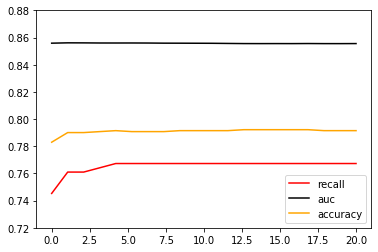

In [137]:
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend(loc=4)
plt.ylim([0.72,0.88])
plt.show()

In [138]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.790071,recall is 0.761006', auc is 0.856100
00:02:988011


### 调整ROC曲线阈值

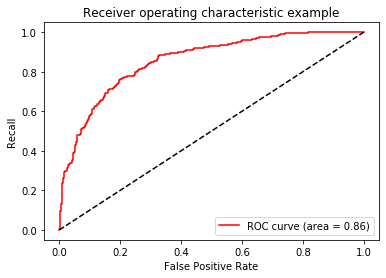

In [139]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)

area = roc_auc_score(Ytest,clf.decision_function(Xtest))

plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [140]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.011916119080159437

In [142]:
from sklearn.metrics import accuracy_score as AC

times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)

prob = pd.DataFrame(clf.decision_function(Xtest))

prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0

#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.788652,recall is 0.767296
00:02:644954
